<a href="https://colab.research.google.com/github/Mateus-Brandao/Data-Science/blob/main/Clustering_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('CC GENERAL.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
dados.drop(columns = ['CUST_ID','TENURE'], inplace = True)
dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
missing = dados.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
dados.fillna(dados.median(), inplace = True)
missing = dados.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
dados.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


# Normalizando os dados

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
values = Normalizer().fit_transform(dados.values)
print (values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


# Aplicando KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

# Validando os dados

# Calculando o Silhouette

In [ ]:
from sklearn import metrics

In [ ]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette)

0.3645055324417282


# Calculando Davies-Bouldin

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075685662353398


# Calculando o Indice Calinski-Harabasz

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.800717231779


# Definindo a função de Clustering

In [ ]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters= n_clusters, n_init = 10, max_iter= 300)
  labels = kmeans.fit_predict(dataset)

  s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  return s, dbs, calinski

In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print('silhouette = ', s1)
print('DBS = ', dbs1)
print('Calinski = ', calinski1)

silhouette =  0.32723798026310313
DBS =  1.3095216018943303
Calinski =  3526.4553723329195


In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print('silhouette = ', s2)
print('DBS = ', dbs2)
print('Calinski = ', calinski2)

silhouette =  0.3643891019677421
DBS =  1.075928412708598
Calinski =  3431.776631279097


In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(20, values)
print('silhouette = ', s3)
print('DBS = ', dbs3)
print('Calinski = ', calinski3)

silhouette =  0.2925662694712952
DBS =  1.2259698201292808
Calinski =  2404.960764023254


### Criando um conjunto de dados aleatório

In [ ]:
random_data = np.random.rand(8950, 16)
clustering_algorithm(5, random_data)

(0.0393234154299239, 3.519568827430409, 302.1262218867499)

In [ ]:
print(s2,dbs2,calinski2)

0.3643891019677421 1.075928412708598 3431.776631279097


# Dividindo a base dados

In [ ]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1,dbs1,calinski1)
print(s2,dbs2,calinski2)
print(s3,dbs3,calinski3)

0.36908155221853267 1.058044568559603 1204.0558494933455
0.3538086555291272 1.138441448645271 1194.9493877267585
0.36713104970461446 1.0991014125845049 1167.5075975296127


# Interpretação dos Clusters já validados

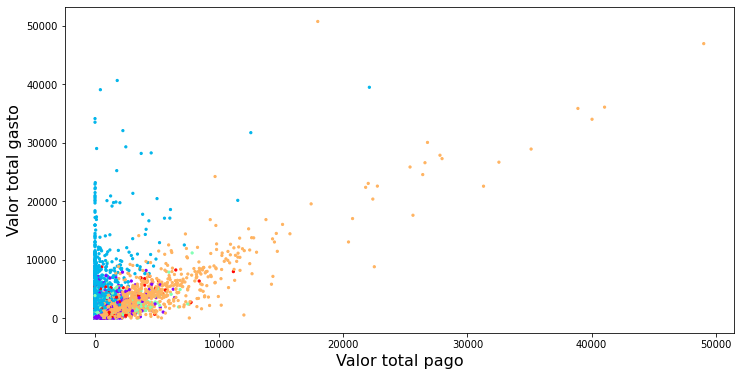

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Valor total pago', fontsize = 16)
plt.ylabel('Valor total gasto', fontsize = 16)
plt.show()

In [ ]:
dados['Clusters'] = labels

In [ ]:
dados.groupby('Clusters').describe()

BALANCE                                                    \
           count         mean          std        min          25%   
Clusters                                                             
0         3280.0   443.746756   846.398201   0.000000    23.365333   
1         1072.0  1794.637544  1983.094646   0.000000   506.925348   
2         2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3         1539.0  1144.165942  1664.223404   0.000000   212.743922   
4          411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                 BALANCE_FREQUENCY            \
                  50%          75%           max             count      mean   
Clusters                                                                       
0           82.941478   410.126095   9630.367575            3280.0  0.774389   
1         1087.920500  2316.353276  14581.459140            1072.0  0.862113   
2         2173.994774  4224.605542  18495.558550            2648.0  0.963768   
3          556.359504  1372.605793  19043.138560            1539.0  0.928301   
4         1337.287314  2138.678431  11670.179850             411.0  0.989486   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
          ...              75%           max            count      mean   
Clusters  ...                                                             
0         ...       248.733727   4483.503862           3280.0  0.246806   
1         ...       886.834603  21235.065300           1072.0  0.117280   
2         ...      1330.437428   8345.641905           2648.0  0.001800   
3         ...       525.257953  18621.013310           1539.0  0.277969   
4         ...      7112.618584  76406.207520            411.0  0.019318   

                                                       
               std  min  25%       50%       75%  max  
Clusters                                               
0         0.346748  0.0  0.0  0.000000  0.444444  1.0  
1         0.186888  0.0  0.0  0.083333  0.142857  1.0  
2         0.023264  0.0  0.0  0.000000  0.000000  0.6  
3         0.366883  0.0  0.0  0.083333  0.545455  1.0  
4         0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [2.35417892e-01 2.16635031e-04 6.01593847e-02 3.41108036e-02
  2.60537957e-02 4.00438484e-01 5.27178877e-05 2.04676638e-05
  3.52785951e-05 6.55507889e-05 1.57259277e-03 1.12193031e-03
  5.35208153e-01 5.97633409e-01 1.04565201e-01 2.77429650e-05]
 [5.04294070e-01 2.72242076e-04 6.17554553e-02 3.62405829e-02
  2.55365937e-02 2.52765717e-01 6.72943541e-05 2.57072238e-05
  4.50409323e-05 5.74261583e-05 1.15669149e-03 1.33139220e-03
  7.19260678e-01 1.66160406e-01 1.79203910e-01 5.52512128e-07]
 [1.60019989e-01 2.45067415e-04 4.38386606e-01 2.57038615e-01
  1.81519502e-01 2.60235369e-02 2.04206502e-04 8.89789093e-05
  1.50451494e-04 9.39554416e-06 1.70326014e-04 6.17071281e-03
  6.03648627e-01 4.02922922e-01 8.54021682e-02 7.18645733e-05]
 [3.

In [ ]:
max = len(centroids[0])
for i in range(max):
  print(dados.columns.values[i], '\n {:.4f}'.format(centroids[:,i].var()))

BALANCE 
 0.0224
BALANCE_FREQUENCY 
 0.0000
PURCHASES 
 0.0197
ONEOFF_PURCHASES 
 0.0077
INSTALLMENTS_PURCHASES 
 0.0036
CASH_ADVANCE 
 0.0226
PURCHASES_FREQUENCY 
 0.0000
ONEOFF_PURCHASES_FREQUENCY 
 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
 0.0000
CASH_ADVANCE_FREQUENCY 
 0.0000
CASH_ADVANCE_TRX 
 0.0000
PURCHASES_TRX 
 0.0000
CREDIT_LIMIT 
 0.0360
PAYMENTS 
 0.0279
MINIMUM_PAYMENTS 
 0.0543
PRC_FULL_PAYMENT 
 0.0000


BALANCE 0.0223

PURCHASES 0.0196

CASH_ADVANCE 0.0225

CREDIT_LIMIT 0.0362

PAYMENTS 0.0279

In [ ]:
description = dados.groupby('Clusters')['BALANCE', 'PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)


              BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
Clusters                                                                      
0          443.746756   629.249107    141.482978   5130.547795   814.294226   
1         1794.637544   470.990466   3269.757206   3974.040310  4701.016454   
2         3038.132314   385.096760   1636.114441   4496.336858   968.599396   
3         1144.165942  3274.047005    185.924210   4102.378266  3045.625330   
4         1987.501586   854.865815    421.129352   2227.737226  1336.238911   

          n_clients  
Clusters             
0              3280  
1              1072  
2              2648  
3              1539  
4               411  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Cluster 0 é o que menos gasta. São bons pagadores. Maior número de clientes

Cluster 1 tem o maior saque e seus pagamentos são os maiores. Tem poucos clientes

Cluster 2 é o que tem maior Balance. São péssimos pagadores. Tem uma boa quantidade de clientes

Cluster 3 tem a maior compra e seu pagamento também é considerável. São bons pagadores. Tem alguns clientes

Cluster 4 não são bons pagadores. Quase não tem clientes

In [ ]:
dados.groupby('Clusters')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
1,1072.0,0.117280,0.186888,0.0,0.0,0.083333,0.142857,1.0
2,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
3,1539.0,0.277969,0.366883,0.0,0.0,0.083333,0.545455,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
